In [1]:
import os
import glob
import numpy as np
import pandas as pd

In [2]:
filepath = '/Users/frankanayet/Desktop/Data_Incubator/'
os.chdir(filepath)

In [3]:
files = glob.glob('final_db*')
files[0]

'final_db.csv'

In [4]:
#df_list = []
#for name in files:
#    df = pd.read_csv(name)
#    df_list.append(df)
dat = pd.read_csv(files[0])
dat  

,Unnamed: 0,def,defscore,description,down,gameid,min,nextscore,off,offscore,qtr,scorechange,scorediff,season,sec,series1stdn,teamwin,togo,ydline,secs_to_end
0,0,NYG,0,J.Cortez kicks 75 yards from SF 30 to NYG -5. ...,NaN,20020905_SF@NYG,NaN,NaN,SF,0,1,NaN,NaN,2002,0,NaN,NaN,NaN,NaN,NaN
1,1,SF,0,(15:00) T.Barber left end to NYG 24 for 4 yard...,1,20020905_SF@NYG,60,NaN,NYG,0,1,NaN,NaN,2002,0,NaN,NaN,10,80,3600
2,2,SF,0,(14:25) K.Collins pass incomplete to J.Shockey...,2,20020905_SF@NYG,59,NaN,NYG,0,1,NaN,NaN,2002,25,NaN,NaN,6,76,3565
3,3,SF,0,(14:20) PENALTY on NYG-J.Shockey False Start ...,3,20020905_SF@NYG,59,NaN,NYG,0,1,NaN,NaN,2002,20,NaN,NaN,6,76,3560
4,4,SF,0,(14:20) (Shotgun) K.Collins pass intended for ...,3,20020905_SF@NYG,59,NaN,NYG,0,1,NaN,NaN,2002,20,NaN,NaN,11,81,3560
5,5,NYG,0,(14:09) J.Garcia right end ran ob at NYG 7 for...,1,20020905_SF@NYG,59,NaN,SF,0,1,NaN,NaN,2002,9,NaN,NaN,10,23,3549
6,6,NYG,0,(13:38) PENALTY on SF-R.Stone False Start 5 ...,1,20020905_SF@NYG,58,NaN,SF,0,1,NaN,NaN,2002,38,NaN,NaN,7,7,3518
7,7,NYG,0,(13:35) G.Hearst left guard to NYG 8 for 4 yar...,1,20020905_SF@NYG,58,NaN,SF,0,1,NaN,NaN,2002,35,NaN,NaN,12,12,3515
8,8,NYG,0,(12:47) J.Garcia pass incomplete to T.Owens.,2,20020905_SF@NYG,57,NaN,SF,0,1,NaN,NaN,2002,47,NaN,NaN,8,8,3467
9,9,NYG,0,(12:40) J.Garcia pass to G.Hearst to NYG 7 for...,3,20020905_SF@NYG,57,NaN,SF,0,1,NaN,NaN,2002,40,NaN,NaN,8,8,3460


In [6]:
dat.keys()

Index([u'Unnamed: 0', u'def', u'defscore', u'description', u'down', u'gameid',
       u'min', u'nextscore', u'off', u'offscore', u'qtr', u'scorechange',
       u'scorediff', u'season', u'sec', u'series1stdn', u'teamwin', u'togo',
       u'ydline', u'secs_to_end'],
      dtype='object')

In [7]:
dat['secs_to_half'] = dat.secs_to_end

In [8]:
dat['secs_to_half'][dat['secs_to_half']>60*30] = dat['secs_to_half'][dat['secs_to_half']>60*30] - 60*30

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
dat['pass'] = dat.description.str.contains('pass')

In [10]:
dat['kickoff'] = dat.description.str.contains('kicks')

In [11]:
dat['extra_point'] = dat.description.str.contains('extra point')

In [12]:
dat['punt'] = dat.description.str.contains('punts')

In [13]:
dat.iloc[4].description

'(14:20) (Shotgun) K.Collins pass intended for T.Barber INTERCEPTED by T.Parrish (M.Rumph) at NYG 29. T.Parrish to NYG 23 for 6 yards (T.Barber).'

In [14]:
dat['run'] = dat.description.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end')

In [15]:
dat['kneel'] = dat.description.str.contains('kneel')

In [16]:
dat['sack'] = dat.description.str.contains('sacked')

In [17]:
dat['penalty'] = dat.description.str.contains('PENALTY')

In [18]:
dat['field_goal'] = dat.description.str.contains('field goal')

In [19]:
dat['fumble'] = dat.description.str.contains('fumble')

In [20]:
dat['interception'] = dat.description.str.contains('intercepted')

In [21]:
dat['scramble'] = dat.description.str.contains('scrambles')

In [22]:
dat['run_scramble'] = dat.run | dat.scramble

In [23]:
dat['spike'] = dat.description.str.contains('spikes')

In [24]:
dat['team_separator'] = dat.gameid.str.find('@')

In [25]:
dat['away_start_ix'] = dat.gameid.str.find('_')

In [26]:
dat['home_team'] = dat.gameid.str[-3:]

In [27]:
dat.home_team = dat.home_team.str.replace('@','')

In [28]:
dat['away_team'] = np.nan

In [29]:
dat['away_team'][dat['def']==dat['home_team']] = dat['off'][dat['def']==dat['home_team']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
dat['away_team'][dat['off']==dat['home_team']] = dat['def'][dat['off']==dat['home_team']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
dat['home_score'] = np.nan

In [32]:
dat['home_score'][dat['home_team']==dat['off']] = dat.offscore[dat['home_team']==dat['off']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
dat['home_score'][dat['home_team']==dat['def']] = dat.defscore[dat['home_team']==dat['def']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
dat['away_score'] = np.nan

In [35]:
dat['away_score'][dat['home_team']==dat['off']] = dat.defscore[dat['home_team']==dat['off']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
dat['away_score'][dat['home_team']==dat['def']] = dat.offscore[dat['home_team']==dat['def']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
dat.scorediff = dat.offscore - dat.defscore

In [38]:
dat.keys()

Index([u'Unnamed: 0', u'def', u'defscore', u'description', u'down', u'gameid',
       u'min', u'nextscore', u'off', u'offscore', u'qtr', u'scorechange',
       u'scorediff', u'season', u'sec', u'series1stdn', u'teamwin', u'togo',
       u'ydline', u'secs_to_end', u'secs_to_half', u'pass', u'kickoff',
       u'extra_point', u'punt', u'run', u'kneel', u'sack', u'penalty',
       u'field_goal', u'fumble', u'interception', u'scramble', u'run_scramble',
       u'spike', u'team_separator', u'away_start_ix', u'home_team',
       u'away_team', u'home_score', u'away_score'],
      dtype='object')

In [39]:
dat['scorediff_home'] = dat.home_score - dat.away_score

In [40]:
dat['scorediff_away'] = dat.away_score - dat.home_score

In [41]:
dat.to_csv('archive.csv')

In [42]:
from sklearn import cluster
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt
% matplotlib inline

In [43]:
dat.secs_to_end.unique()

array([   nan,  3600.,  3565., ...,  -724.,  -819.,  -870.])

In [44]:
dat['scorediff_norm'] = (dat['scorediff'] - dat['scorediff'].mean())/dat['scorediff'].std()

In [45]:
dat['scorediff_home_norm'] = (dat['scorediff_home'] - dat['scorediff_home'].mean())/dat['scorediff_home'].std()

In [46]:
dat['scorediff_away_norm'] = (dat['scorediff_away'] - dat['scorediff_away'].mean())/dat['scorediff_away'].std()

In [47]:
dat['secs_to_end_norm'] = (dat['secs_to_end'] - dat['secs_to_end'].mean())/dat['secs_to_end'].std()

In [48]:
dat['secs_to_half_norm'] = (dat['secs_to_half'] - dat['secs_to_half'].mean())/dat['secs_to_half'].std()

In [49]:
dat['togo_norm'] = (dat['togo'] - dat['togo'].mean())/dat['togo'].std()

In [50]:
dat['ydline_norm'] = (dat['ydline'] - dat['ydline'].mean())/dat['ydline'].std()

In [51]:
import seaborn as sns

In [52]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

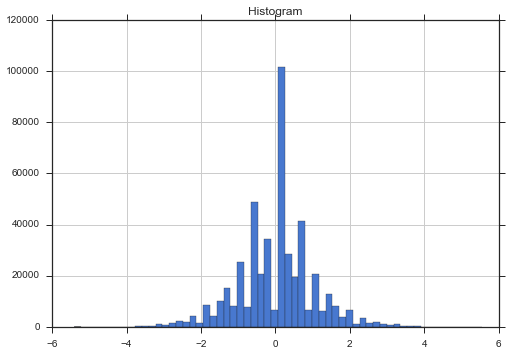

In [53]:
dat.scorediff_norm.hist(bins=60)
plt.title('Histogram')

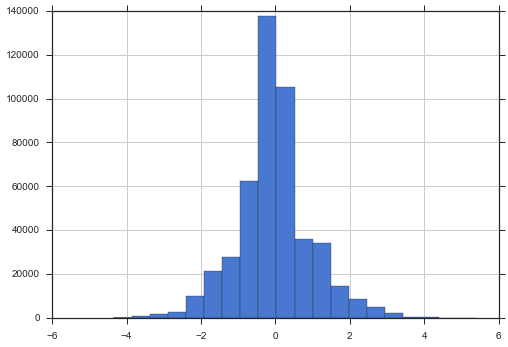

In [54]:
dat.scorediff_home_norm.hist(bins=20)

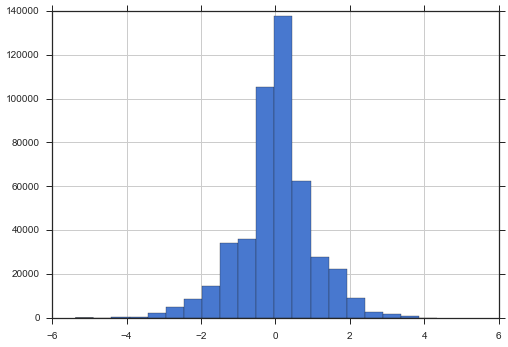

In [55]:
dat.scorediff_away_norm.hist(bins=20)

Create a variable for when the score is 0-0 because it is an event that is very frequent and might be relevant

In [56]:
dat['noscore'] = (dat['offscore'] == 0) & (dat['defscore'] == 0)

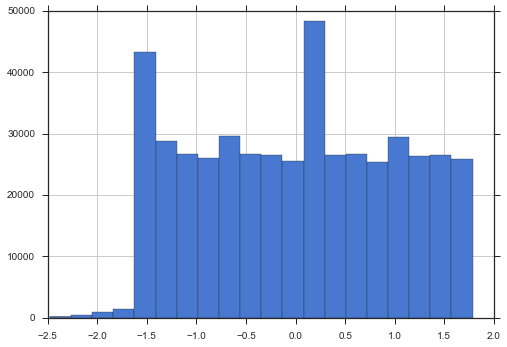

In [57]:
dat.secs_to_end_norm.hist(bins=20)

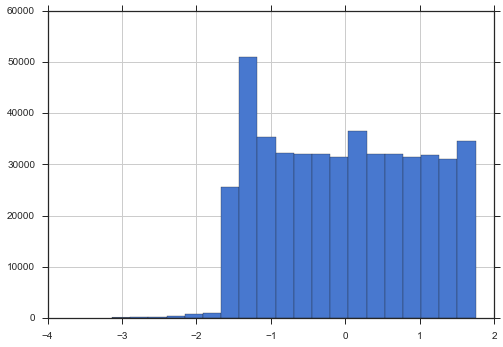

In [58]:
dat.secs_to_half_norm.hist(bins=20)

(0, 40)

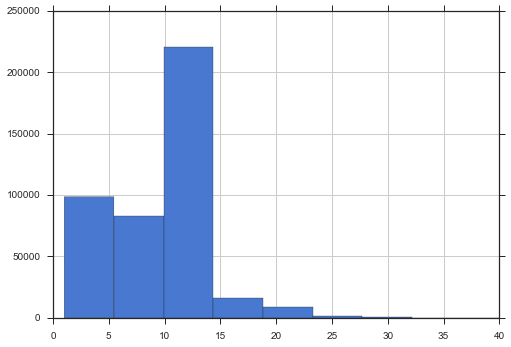

In [59]:
dat.togo.hist(bins=20)
plt.xlim([0,40])

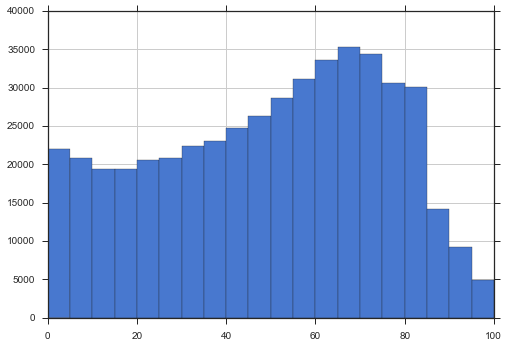

In [60]:
dat.ydline.hist(bins=20)

The defense has an overall advantage mean ydline is greater than 50

In [61]:
dat['down_cat'] = dat['down'].astype('category')

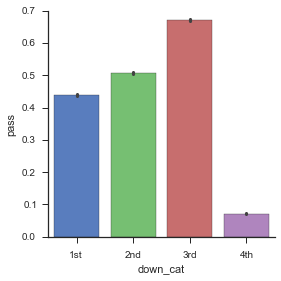

In [62]:
labels = ['1st', '2nd', '3rd', '4th']
g = sns.factorplot(x='down_cat',y='pass',data=dat,kind='bar')
g.set_xticklabels(labels)

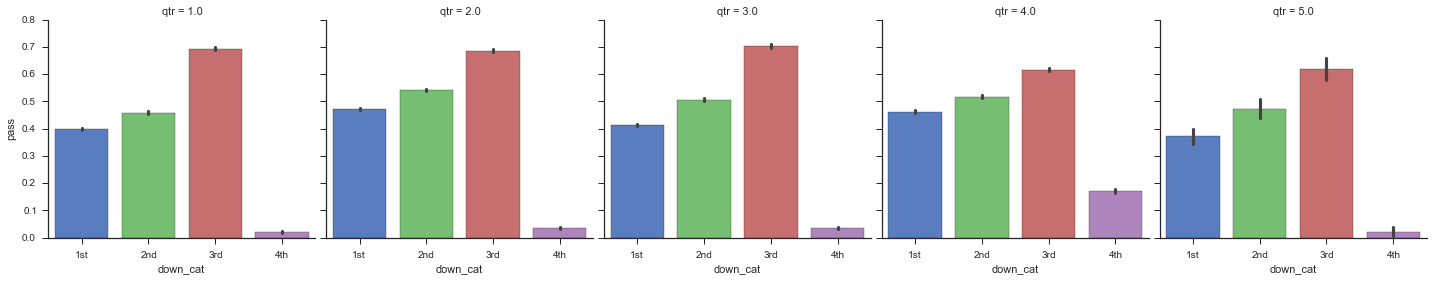

In [63]:
g = sns.factorplot(x='down_cat',y='pass',col='qtr',data=dat,kind='bar')
g.set_xticklabels(labels)

In [64]:
int_passes = dat['pass'][(dat['interception']==True) & (dat['pass']==False)]

In [65]:
int_passes

143419    False
143446    False
143460    False
143473    False
175148    False
416279    False
Name: pass, dtype: object

In [66]:
dat.description.iloc[int_passes.index]

143419    (0:45)  Michael Vick was intercepted.  Jonatha...
143446    (4:19)  Vinny Testaverde was intercepted.  DeA...
143460    (14:21)  Michael Vick was intercepted.  Ty Law...
143473    (10:20)  Michael Vick was intercepted.  David ...
175148    (13:25) PENALTY on WAS-J.Jansen False Start 5 ...
416279    (3:08)  Matthew Stafford was intercepted.  Tra...
Name: description, dtype: object

In [67]:
dat['description'].iloc[175148]

'(13:25) PENALTY on WAS-J.Jansen False Start 5 yards enforced at WAS 35 - No Play. Pass was intercepted but nullified because of the penalty.'

In [68]:
dat.description.iloc[416279]

'(3:08)  Matthew Stafford was intercepted.  Tracy Porter returned the interception for a loss of 7 yards. '

In [69]:
dat['pass'].iloc[int_passes.index] = True
dat['pass'].iloc[int_passes.index]

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


143419    True
143446    True
143460    True
143473    True
175148    True
416279    True
Name: pass, dtype: object

In [70]:
sack_pass = dat['pass'][(dat['sack']==True) & (dat['pass']==False)]

In [71]:
sack_pass.head()

96     False
119    False
132    False
292    False
400    False
Name: pass, dtype: object

In [72]:
dat.description.iloc[96]

'(8:37) K.Collins sacked at NYG 4 for -10 yards (D.Stubblefield).'

In [73]:
dat[['pass', 'sack']].sum()

pass    200692
sack     13310
dtype: float64

In [74]:
dat['attempted_pass'] = dat['pass']

In [75]:
dat['attempted_pass'].iloc[sack_pass.index] = True

In [76]:
dat[['pass', 'sack', 'attempted_pass']].sum()

pass              200692
sack               13310
attempted_pass    213882
dtype: float64

In [77]:
dat.keys()

Index([u'Unnamed: 0', u'def', u'defscore', u'description', u'down', u'gameid',
       u'min', u'nextscore', u'off', u'offscore', u'qtr', u'scorechange',
       u'scorediff', u'season', u'sec', u'series1stdn', u'teamwin', u'togo',
       u'ydline', u'secs_to_end', u'secs_to_half', u'pass', u'kickoff',
       u'extra_point', u'punt', u'run', u'kneel', u'sack', u'penalty',
       u'field_goal', u'fumble', u'interception', u'scramble', u'run_scramble',
       u'spike', u'team_separator', u'away_start_ix', u'home_team',
       u'away_team', u'home_score', u'away_score', u'scorediff_home',
       u'scorediff_away', u'scorediff_norm', u'scorediff_home_norm',
       u'scorediff_away_norm', u'secs_to_end_norm', u'secs_to_half_norm',
       u'togo_norm', u'ydline_norm', u'noscore', u'down_cat',
       u'attempted_pass'],
      dtype='object')

In [78]:
down_dummies = pd.get_dummies(dat['down'],prefix='down')

In [79]:
dat = pd.concat([dat,down_dummies], axis=1)

In [80]:
qtr_dummies = pd.get_dummies(dat['qtr'],prefix='qtr')

In [81]:
dat = pd.concat([dat,qtr_dummies], axis=1)

In [82]:
dat.keys()

Index([u'Unnamed: 0', u'def', u'defscore', u'description', u'down', u'gameid',
       u'min', u'nextscore', u'off', u'offscore', u'qtr', u'scorechange',
       u'scorediff', u'season', u'sec', u'series1stdn', u'teamwin', u'togo',
       u'ydline', u'secs_to_end', u'secs_to_half', u'pass', u'kickoff',
       u'extra_point', u'punt', u'run', u'kneel', u'sack', u'penalty',
       u'field_goal', u'fumble', u'interception', u'scramble', u'run_scramble',
       u'spike', u'team_separator', u'away_start_ix', u'home_team',
       u'away_team', u'home_score', u'away_score', u'scorediff_home',
       u'scorediff_away', u'scorediff_norm', u'scorediff_home_norm',
       u'scorediff_away_norm', u'secs_to_end_norm', u'secs_to_half_norm',
       u'togo_norm', u'ydline_norm', u'noscore', u'down_cat',
       u'attempted_pass', u'down_1.0', u'down_2.0', u'down_3.0', u'down_4.0',
       u'qtr_1.0', u'qtr_2.0', u'qtr_3.0', u'qtr_4.0', u'qtr_5.0'],
      dtype='object')

In [83]:
dat_clus = dat[['scorediff','secs_to_end_norm','secs_to_half_norm','togo_norm','ydline_norm','noscore','down_1.0',
               'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0',]]

In [84]:
dat_clus.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
dat_clus.isnull().sum()

scorediff            0
secs_to_end_norm     0
secs_to_half_norm    0
togo_norm            0
ydline_norm          0
noscore              0
down_1.0             0
down_2.0             0
down_3.0             0
down_4.0             0
qtr_1.0              0
qtr_2.0              0
qtr_3.0              0
qtr_4.0              0
qtr_5.0              0
dtype: int64

In [86]:
dat_clus.count()

scorediff            428864
secs_to_end_norm     428864
secs_to_half_norm    428864
togo_norm            428864
ydline_norm          428864
noscore              428864
down_1.0             428864
down_2.0             428864
down_3.0             428864
down_4.0             428864
qtr_1.0              428864
qtr_2.0              428864
qtr_3.0              428864
qtr_4.0              428864
qtr_5.0              428864
dtype: int64

In [87]:
from sklearn.cluster import KMeans

In [88]:
from sklearn.decomposition import PCA

In [89]:
from sklearn import metrics

In [90]:
pca_dat = PCA(n_components=2).fit_transform(dat_clus)

In [91]:
clus = KMeans(n_clusters=3,init='k-means++',)
clus.fit(dat_clus)
labs = clus.labels_
dat_clus['Labels3'] = labs

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
pca_dat[:,0]

array([-1.07160646, -1.07510586, -1.0753885 , ...,  8.9476883 ,
        8.94409397,  8.9402758 ])

In [93]:
dat_clus['PCA_1'] = pca_dat[:,0]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
dat_clus['PCA_2'] = pca_dat[:,1]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
dat = pd.concat([dat,dat_clus['Labels3'],dat_clus['PCA_1'],dat_clus['PCA_2']], axis=1, join_axes=[dat.index])

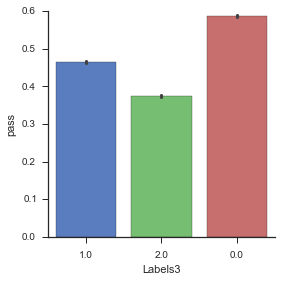

In [96]:
g = sns.factorplot(x='Labels3',y='pass',data=dat,kind='bar')

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


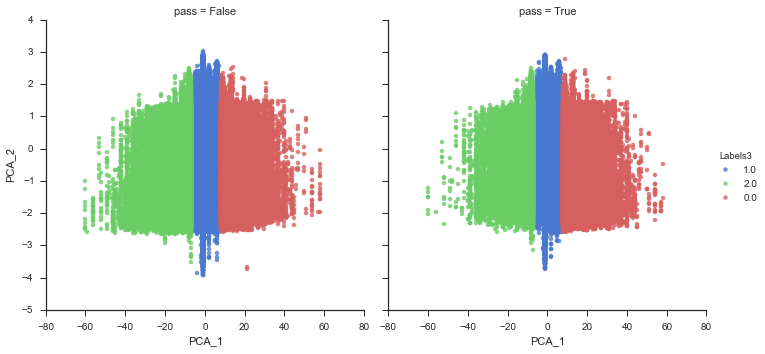

In [97]:
g = sns.lmplot(x='PCA_1',y='PCA_2',hue='Labels3',col='pass',data=dat,fit_reg=False)

In [98]:
clus_8 = KMeans(n_clusters=8,init='k-means++',)
clus_8.fit(dat_clus)
labs = clus_8.labels_
dat_clus['Labels8'] = labs

In [99]:
dat = pd.concat([dat,dat_clus['Labels8']], axis=1, join_axes=[dat.index])

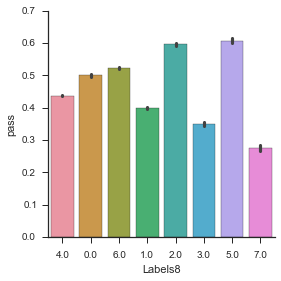

In [100]:
g = sns.factorplot(x='Labels8',y='pass',data=dat,kind='bar')

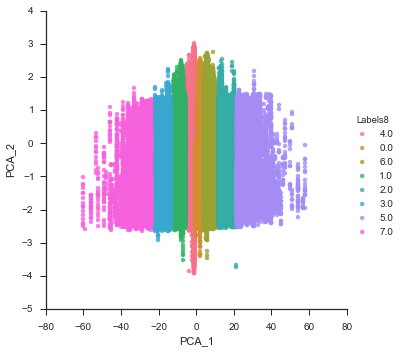

In [101]:
g = sns.lmplot(x='PCA_1',y='PCA_2',hue='Labels8',data=dat,fit_reg=False)

In [102]:
dat[['scorediff','secs_to_end','secs_to_half','togo','ydline','noscore','down_1.0',
     'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0','Labels3','pass']].groupby('Labels3').mean()

,scorediff,secs_to_end,secs_to_half,togo,ydline,noscore,down_1.0,down_2.0,down_3.0,down_4.0,qtr_1.0,qtr_2.0,qtr_3.0,qtr_4.0,qtr_5.0
Labels3,,,,,,,,,,,,,,,
0,-16.155047,1232.406843,705.726381,8.760418,51.995433,0.00000,0.413836,0.298511,0.187658,0.099995,0.042267,0.250464,0.301817,0.405416,0.000036
1,-1.533646,2037.625687,913.576838,8.518693,51.884045,0.23322,0.394753,0.301113,0.197807,0.106326,0.348698,0.275910,0.174944,0.188475,0.011973
2,12.481151,1411.916894,760.083910,8.437643,50.423634,0.00000,0.390697,0.301360,0.199973,0.107971,0.092070,0.270186,0.295746,0.341243,0.000754


In [103]:
dat[['scorediff','secs_to_end','secs_to_half','togo','ydline','noscore','down_1.0',
     'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0','Labels8','pass']].groupby('Labels8').mean()

,scorediff,secs_to_end,secs_to_half,togo,ydline,noscore,down_1.0,down_2.0,down_3.0,down_4.0,qtr_1.0,qtr_2.0,qtr_3.0,qtr_4.0,qtr_5.0
Labels8,,,,,,,,,,,,,,,
0,-3.198592,1649.547651,749.842400,8.571559,51.690113,0.000000,0.402860,0.301263,0.194498,0.101379,0.182344,0.317710,0.212547,0.286562,0.000837
1,7.966803,1579.731960,777.592167,8.471037,50.763759,0.000000,0.393317,0.300372,0.198646,0.107665,0.136589,0.309139,0.269815,0.283436,0.001021
2,-16.302714,1245.819615,706.001173,8.791654,51.846028,0.000000,0.413901,0.298187,0.187024,0.100889,0.039384,0.260655,0.305435,0.394455,0.000070
3,16.277227,1200.411755,736.859170,8.429363,49.792666,0.000000,0.387466,0.302942,0.200811,0.108782,0.022516,0.235235,0.339361,0.402508,0.000380
4,1.007881,2275.676186,1015.613644,8.449016,51.675935,0.418455,0.390296,0.301340,0.199839,0.108524,0.451959,0.248180,0.148763,0.130399,0.020699
5,-28.650990,839.690130,672.750155,8.735458,52.231822,0.000000,0.413212,0.299892,0.185102,0.101795,0.002707,0.090037,0.314666,0.592590,0.000000
6,-8.119069,1701.301280,790.235707,8.679208,52.483683,0.000000,0.404007,0.299791,0.193641,0.102561,0.194532,0.311768,0.232385,0.260551,0.000764
7,28.570813,830.781634,691.678379,8.235827,50.425199,0.000000,0.382626,0.301250,0.206187,0.109937,0.002371,0.074908,0.321621,0.601099,0.000000


In [104]:
from sklearn import linear_model

In [105]:
Z =dat[['scorediff','secs_to_end','secs_to_half','togo','ydline','noscore','down_1.0',
     'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0','pass']]

In [106]:
Z.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
X = Z[['scorediff','secs_to_end','secs_to_half','togo','ydline','noscore','down_1.0',
     'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0']]
Y = Z['pass']

In [108]:
logreg = linear_model.LogisticRegression()

In [109]:
logreg.fit_transform(X, Y)

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [110]:
pd.DataFrame(zip(X.columns, np.transpose(logreg.coef_)))

,0,1
0,scorediff,[-0.032159082596]
1,secs_to_end,[-7.84997482693e-05]
2,secs_to_half,[-0.000136262780113]
3,togo,[0.0671186434139]
4,ydline,[0.00036538561964]
5,noscore,[0.040210438101]
6,down_1.0,[-0.0394433666644]
7,down_2.0,[0.391500806439]
8,down_3.0,[1.17541013178]
9,down_4.0,[-2.16270346238]


In [111]:
predicted = logreg.predict(X)
print predicted

[False False True ..., True True True]


In [112]:
predicted_prob = logreg.predict_proba(X)
print predicted_prob

[[ 0.62189945  0.37810055]
 [ 0.5815388   0.4184612 ]
 [ 0.38796137  0.61203863]
 ..., 
 [ 0.46160405  0.53839595]
 [ 0.42076845  0.57923155]
 [ 0.3161595   0.6838405 ]]


In [113]:
centers = clus.cluster_centers_
centers[0]

array([ -1.61550473e+01,  -4.57468857e-01,  -2.27591758e-01,
         5.24434156e-02,   1.14450409e-01,  -2.21628271e-13,
         4.13836164e-01,   2.98511013e-01,   1.87657581e-01,
         9.99952429e-02,   4.22672566e-02,   2.50463822e-01,
         3.01817230e-01,   4.05416013e-01,   3.56786071e-05])

In [114]:
logreg.predict_proba(centers)

array([[ 0.5230958 ,  0.4769042 ],
       [ 0.62840112,  0.37159888],
       [ 0.73284377,  0.26715623]])

In [115]:
clus_8 = KMeans(n_clusters=8,init='k-means++',)
clus_8.fit(X)
labs = clus_8.labels_
dat_clus['Labels8'] = labs

In [116]:
centers8 = clus_8.cluster_centers_
centers8[0]

array([ -1.19017600e+00,   6.06242398e+02,   6.06242398e+02,
         8.56772397e+00,   5.06748931e+01,   4.17619568e-04,
         3.92124888e-01,   3.00228696e-01,   1.98826688e-01,
         1.08819728e-01,  -1.39166456e-13,   2.64233080e-13,
         9.76718706e-14,   1.00000000e+00,   2.81458884e-15])

In [117]:
logreg.predict_proba(centers8)

array([[ 0.55257388,  0.44742612],
       [ 0.53569233,  0.46430767],
       [ 0.59780015,  0.40219985],
       [ 0.57352106,  0.42647894],
       [ 0.55423743,  0.44576257],
       [ 0.57352174,  0.42647826],
       [ 0.52885591,  0.47114409],
       [ 0.51166587,  0.48833413]])

In [118]:
clus_20 = KMeans(n_clusters=20,init='k-means++',)
clus_20.fit(X)
labs = clus_20.labels_
dat_clus['Labels20'] = labs

In [119]:
dat = pd.concat([dat,dat_clus['Labels20']], axis=1, join_axes=[dat.index])

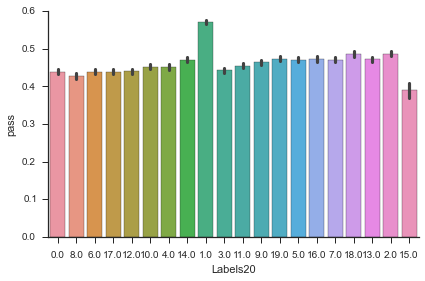

In [120]:
g = sns.factorplot(x='Labels20',y='pass',data=dat,kind='bar',aspect=1.5)

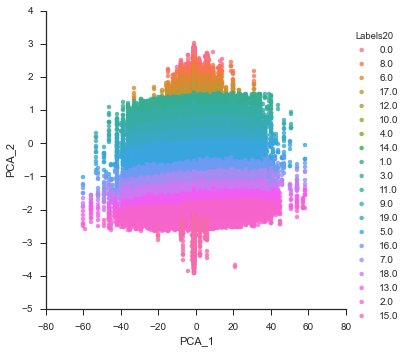

In [121]:
g = sns.lmplot(x='PCA_1',y='PCA_2',hue='Labels20',data=dat,fit_reg=False)

In [122]:
centers20 = clus_20.cluster_centers_
centers20[0]

array([ -2.27752219e-01,   3.50750290e+03,   1.70750290e+03,
         8.52702263e+00,   6.02836098e+01,   9.50230029e-01,
         4.43700915e-01,   3.03173939e-01,   1.73242251e-01,
         7.98828942e-02,   1.00000000e+00,  -8.42659276e-14,
         8.41826608e-14,  -2.70894418e-14,   1.50747470e-15])

In [123]:
logreg.predict_proba(centers20)

array([[ 0.60036731,  0.39963269],
       [ 0.50799116,  0.49200884],
       [ 0.52010944,  0.47989056],
       [ 0.57885588,  0.42114412],
       [ 0.53003313,  0.46996687],
       [ 0.55420237,  0.44579763],
       [ 0.5866238 ,  0.4133762 ],
       [ 0.55059778,  0.44940222],
       [ 0.59886986,  0.40113014],
       [ 0.56072822,  0.43927178],
       [ 0.53854478,  0.46145522],
       [ 0.57229647,  0.42770353],
       [ 0.55774703,  0.44225297],
       [ 0.53096561,  0.46903439],
       [ 0.51765455,  0.48234545],
       [ 0.56412871,  0.43587129],
       [ 0.56111976,  0.43888024],
       [ 0.57868999,  0.42131001],
       [ 0.54270864,  0.45729136],
       [ 0.55255904,  0.44744096]])

In [124]:
logreg_clus3 = linear_model.LogisticRegression()
logreg_clus8 = linear_model.LogisticRegression()
logreg_clus20 = linear_model.LogisticRegression()

In [125]:
Labels3_dummies = pd.get_dummies(dat['Labels3'],prefix='Labels3')

In [126]:
Labels8_dummies = pd.get_dummies(dat['Labels8'],prefix='Labels8')

In [127]:
Labels20_dummies = pd.get_dummies(dat['Labels20'],prefix='Labels20')

In [128]:
dat = pd.concat([dat,Labels3_dummies], axis=1)

In [129]:
dat = pd.concat([dat,Labels8_dummies], axis=1)

In [130]:
dat = pd.concat([dat,Labels20_dummies], axis=1)

In [131]:
dat.keys()

Index([u'Unnamed: 0', u'def', u'defscore', u'description', u'down', u'gameid',
       u'min', u'nextscore', u'off', u'offscore', u'qtr', u'scorechange',
       u'scorediff', u'season', u'sec', u'series1stdn', u'teamwin', u'togo',
       u'ydline', u'secs_to_end', u'secs_to_half', u'pass', u'kickoff',
       u'extra_point', u'punt', u'run', u'kneel', u'sack', u'penalty',
       u'field_goal', u'fumble', u'interception', u'scramble', u'run_scramble',
       u'spike', u'team_separator', u'away_start_ix', u'home_team',
       u'away_team', u'home_score', u'away_score', u'scorediff_home',
       u'scorediff_away', u'scorediff_norm', u'scorediff_home_norm',
       u'scorediff_away_norm', u'secs_to_end_norm', u'secs_to_half_norm',
       u'togo_norm', u'ydline_norm', u'noscore', u'down_cat',
       u'attempted_pass', u'down_1.0', u'down_2.0', u'down_3.0', u'down_4.0',
       u'qtr_1.0', u'qtr_2.0', u'qtr_3.0', u'qtr_4.0', u'qtr_5.0', u'Labels3',
       u'PCA_1', u'PCA_2', u'Labels8', u'Labels

In [132]:
Z_Clus =dat[['Labels3_0.0',
       'Labels3_1.0', 'Labels3_2.0', 'Labels8', 'Labels8', 'Labels20_0.0',
       'Labels20_1.0', 'Labels20_2.0', 'Labels20_3.0', 'Labels20_4.0',
       'Labels20_5.0', 'Labels20_6.0', 'Labels20_7.0', 'Labels20_8.0',
       'Labels20_9.0', 'Labels20_10.0', 'Labels20_11.0', 'Labels20_12.0',
       'Labels20_13.0', 'Labels20_14.0', 'Labels20_15.0', 'Labels20_16.0',
       'Labels20_17.0', 'Labels20_18.0', 'Labels20_19.0', 'pass']]

In [133]:
Z_Clus.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
X_Clus3 = Z_Clus[['Labels3_0.0',
       'Labels3_1.0', 'Labels3_2.0']]

In [135]:
X_Clus20 = Z_Clus[['Labels20_0.0','Labels20_1.0', 'Labels20_2.0', 'Labels20_3.0', 'Labels20_4.0',
       'Labels20_5.0', 'Labels20_6.0', 'Labels20_7.0', 'Labels20_8.0',
       'Labels20_9.0', 'Labels20_10.0', 'Labels20_11.0', 'Labels20_12.0',
       'Labels20_13.0', 'Labels20_14.0', 'Labels20_15.0', 'Labels20_16.0',
       'Labels20_17.0', 'Labels20_18.0', 'Labels20_19.0']]

In [136]:
Y =Z_Clus[['pass']]

In [137]:
logreg_clus3.fit_transform(X_Clus3, Y)
logreg_clus20.fit_transform(X_Clus20, Y)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [138]:
pd.DataFrame(zip(X_Clus3.columns, np.transpose(logreg_clus3.coef_)))

,0,1
0,Labels3_0.0,[0.427773056787]
1,Labels3_1.0,[-0.065768349995]
2,Labels3_2.0,[-0.43911957962]


In [139]:
pd.DataFrame(zip(X_Clus20.columns, np.transpose(logreg_clus20.coef_)))

,0,1
0,Labels20_0.0,[-0.0948356010988]
1,Labels20_1.0,[0.431974886658]
2,Labels20_2.0,[0.09814461531]
3,Labels20_3.0,[-0.0803351409168]
4,Labels20_4.0,[-0.0433009388049]
5,Labels20_5.0,[0.0340490168502]
6,Labels20_6.0,[-0.0944635999177]
7,Labels20_7.0,[0.0337978272005]
8,Labels20_8.0,[-0.139540864135]
9,Labels20_9.0,[0.00479377883653]


In [140]:
dat[['scorediff','secs_to_end','secs_to_half','togo','ydline','noscore','down_1.0',
     'down_2.0','down_3.0','down_4.0','qtr_1.0','qtr_2.0','qtr_3.0','qtr_4.0','qtr_5.0','Labels3','pass']].groupby('Labels3').mean()

,scorediff,secs_to_end,secs_to_half,togo,ydline,noscore,down_1.0,down_2.0,down_3.0,down_4.0,qtr_1.0,qtr_2.0,qtr_3.0,qtr_4.0,qtr_5.0
Labels3,,,,,,,,,,,,,,,
0,-16.155047,1232.406843,705.726381,8.760418,51.995433,0.00000,0.413836,0.298511,0.187658,0.099995,0.042267,0.250464,0.301817,0.405416,0.000036
1,-1.533646,2037.625687,913.576838,8.518693,51.884045,0.23322,0.394753,0.301113,0.197807,0.106326,0.348698,0.275910,0.174944,0.188475,0.011973
2,12.481151,1411.916894,760.083910,8.437643,50.423634,0.00000,0.390697,0.301360,0.199973,0.107971,0.092070,0.270186,0.295746,0.341243,0.000754


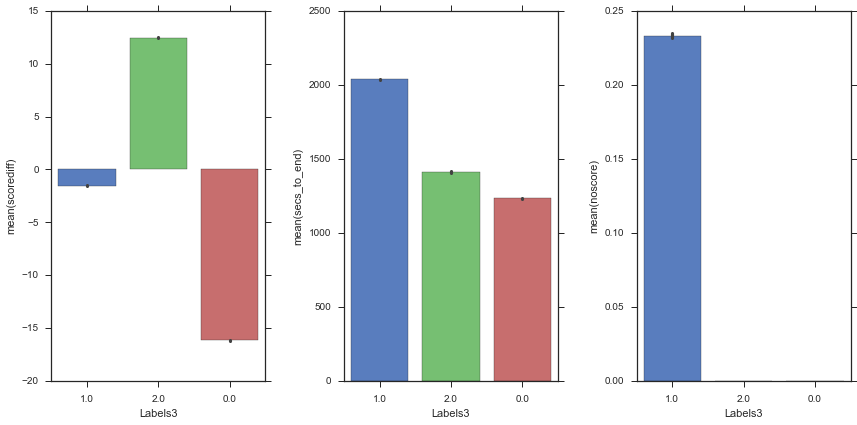

In [142]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharex=True)
sns.barplot(dat["Labels3"], dat['scorediff'], ax=ax1)
sns.barplot(dat["Labels3"], dat['secs_to_end'], ax=ax2)
sns.barplot(dat["Labels3"], dat['noscore'], ax=ax3)
plt.tight_layout(w_pad=3)

In [143]:
dat.to_csv('complete_db.csv')